## Final Project Analysis on Liquor Store in MN

| Element                        | Your Plan |
| ------------------------------ | --------- |
| Topic / Question               | Do days with high discounts result in significantly higher net sales? (it determines if the store's promotion strategy is actually increasing revenue or just cutting profit margins for no benefit.) |
| Hypothesis                     | Days with high discount rates will have a greater mean Net sales than regular-discount days. |
| Outcome / Metric / Test Statistic | Primary metric is Net sales. The t-stat will be the difference in means of Net sales between the Promo Day and Regular Day groups. |
| Units of Analysis              | A single day of sales. Each row in the dataset represents one day's sales totals. |
| Data Source(s)                 | Private daily sales data pulled from POS (March 2024 - October 2025) from a single Minnesota liquor store located in Blaine MN. The data is in the `LiquorStoreDataCleaned.csv` file. |
| Why this data works            | The dataset works because it is clean and contains the exact continuous variables needed: Net sales and discounts. It allows for us to compare (Promo Days vs. Regular Days). |
| Uncertainty Metric             | The Net sales on "Promo Days." Will use bootstrapping to find the 95% confidence interval for the median Net sales. Sales data is often skewed, so median is better choice, satisfying the project's non-CLT requirement. |
| Null Hypothesis                | The store's discount promotions have no positive effect, or even a negative effect, on net sales. Any observed increase in sales on Promo Days is just due to random chance. |


## Step 1: Import Library and inspect the data

In [13]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# load the data and inspect 
file_path = 'LiquorStoreDataCleaned.csv'
liquor = pd.read_csv(file_path)

liquor.head()

,Date,Gross sales,Discounts,Refunds,Net sales,Non-revenue items,Taxes,Amount collected,discount_rate,weekday
0,3/1/24,5415.29,-21.57,0.0,5393.72,0.0,574.30,5968.02,0.003983,Friday
1,3/2/24,4522.27,-9.77,0.0,4512.50,0.0,493.75,5006.25,0.002160,Saturday
2,3/3/24,2304.91,-4.24,0.0,2300.67,0.0,248.76,2549.43,0.001840,Sunday
3,3/4/24,2196.73,-29.33,0.0,2167.40,0.0,234.14,2401.54,0.013352,Monday
4,3/5/24,2451.54,-24.04,0.0,2427.50,0.0,267.34,2694.84,0.009806,Tuesday


In [15]:
# change the data format to datetime

columns_to_drop = [
    'Non-revenue items', 'Refunds', 'discount_rate'
]
liquor = liquor.drop(columns=columns_to_drop)

liquor['Date'] = pd.to_datetime(liquor['Date'])

liquor.head()

/var/folders/qr/p2x8klsx3x55m_nl2qztdt6m0000gn/T/ipykernel_3955/3328414997.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  liquor['Date'] = pd.to_datetime(liquor['Date'])


,Date,Gross sales,Discounts,Net sales,Taxes,Amount collected,weekday
0,2024-03-01,5415.29,-21.57,5393.72,574.30,5968.02,Friday
1,2024-03-02,4522.27,-9.77,4512.50,493.75,5006.25,Saturday
2,2024-03-03,2304.91,-4.24,2300.67,248.76,2549.43,Sunday
3,2024-03-04,2196.73,-29.33,2167.40,234.14,2401.54,Monday
4,2024-03-05,2451.54,-24.04,2427.50,267.34,2694.84,Tuesday


## Step 2: Engineer the Data 

In [29]:

# calc the discount_rate = (abs val of discount) / Gross sales

# handle cases where 'Gross sales' is 0 to avoid dividing by zero.

liquor['discount_rate'] = 0.0 
valid_sales_mask = liquor['Gross sales'] > 0
liquor.loc[valid_sales_mask, 'discount_rate'] = liquor['Discounts'].abs() / liquor['Gross sales']

# Calculate the 75th percentile to show the "promo days"
threshold_75th = liquor['discount_rate'].quantile(0.75)

print(f"The 75th Percentile Threshold is: {threshold_75th:.4f}")

# Create the 'is_promo_day' column (T/F)
liquor['is_promo_day'] = liquor['discount_rate'] > threshold_75th


liquor.head()

The 75th Percentile Threshold is: 0.0109


,Date,Gross sales,Discounts,Net sales,Taxes,Amount collected,weekday,discount_rate,is_promo_day
0,2024-03-01,5415.29,-21.57,5393.72,574.30,5968.02,Friday,0.003983,False
1,2024-03-02,4522.27,-9.77,4512.50,493.75,5006.25,Saturday,0.002160,False
2,2024-03-03,2304.91,-4.24,2300.67,248.76,2549.43,Sunday,0.001840,False
3,2024-03-04,2196.73,-29.33,2167.40,234.14,2401.54,Monday,0.013352,True
4,2024-03-05,2451.54,-24.04,2427.50,267.34,2694.84,Tuesday,0.009806,False


## Step 3: Create Boxplot and Count Promo Day vs Non-Promo Day

In [30]:
# curious to see how many promo days vs regular days we have

is_promo_day_counts = liquor['is_promo_day'].value_counts()
print("\nCounts of Promo Days vs Non-Promo Days:")
print(is_promo_day_counts.to_markdown())


Counts of Promo Days vs Non-Promo Days:
| is_promo_day   |   count |
|:---------------|--------:|
| False          |     457 |
| True           |     153 |


Plot saved as 'module13_checkpoint_plot.png'


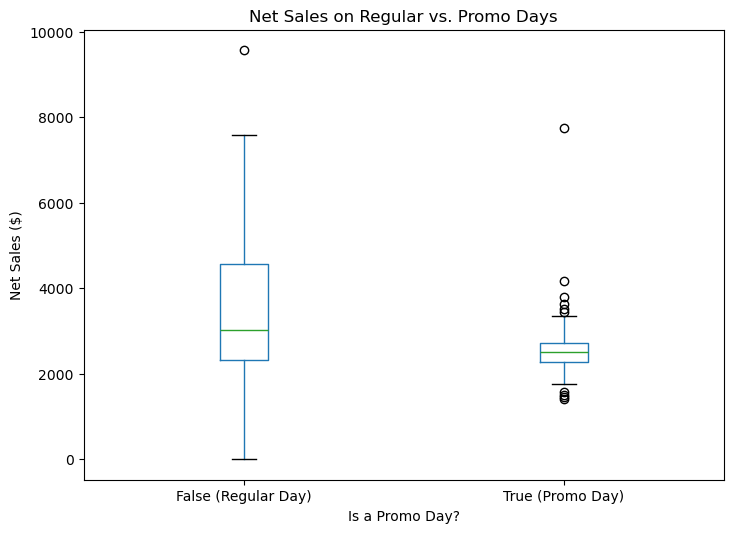

In [33]:

# Create  boxplot to compare the two groups
liquor.boxplot(column='Net sales', by='is_promo_day', grid=False, figsize=(8, 6))

# Add titles and labels
plt.title('Net Sales on Regular vs. Promo Days')
plt.suptitle('') 
plt.xlabel('Is a Promo Day?')
plt.ylabel('Net Sales ($)')
plt.xticks([1, 2], ['False (Regular Day)', 'True (Promo Day)'])

# Save the plot as an image
plt.savefig('module13_checkpoint_plot.png')

print("Plot saved as 'module13_checkpoint_plot.png'")

## Final Analysis

### Part 1: Permutation

In [35]:
# PART 1 - PERMUTATION TEST ---

# 1. add back the 'weekday' column 
liquor['weekday'] = liquor['Date'].dt.day_name()

# 2. Define Test Statistic
# I want the difference in mean Net Sales: (Promo Days) - (Regular Days)

def calculate_diff_in_means(df, group_col, val_col):
    group_means = df.groupby(group_col)[val_col].mean()

    # adding a check to see if we have both True and False keys to avoid errors

    if True not in group_means or False not in group_means:
        return 0.0
    return group_means[True] - group_means[False]

liquor.head()


,Date,Gross sales,Discounts,Net sales,Taxes,Amount collected,weekday,discount_rate,is_promo_day
0,2024-03-01,5415.29,-21.57,5393.72,574.30,5968.02,Friday,0.003983,False
1,2024-03-02,4522.27,-9.77,4512.50,493.75,5006.25,Saturday,0.002160,False
2,2024-03-03,2304.91,-4.24,2300.67,248.76,2549.43,Sunday,0.001840,False
3,2024-03-04,2196.73,-29.33,2167.40,234.14,2401.54,Monday,0.013352,True
4,2024-03-05,2451.54,-24.04,2427.50,267.34,2694.84,Tuesday,0.009806,False


In [38]:
# 3. calc the Observed Difference

obs_diff = calculate_diff_in_means(liquor, 'is_promo_day', 'Net sales')
print(f"Observed Difference in Mean Sales: ${obs_diff:.2f}")

# 4. run rimulation (Stratified by Weekday)
n_simulations = 5000
simulated_diffs = []

# random seed for reproducibility
np.random.seed(42)

for i in range(n_simulations):

    # shuffle 'is_promo_day' but keep the shuffle inside each 'weekday' group.
    # This ensures it never swaps a Monday label with a Saturday label.
    liquor['shuffled_promo'] = liquor.groupby('weekday')['is_promo_day'].transform(np.random.permutation)
    
    # calc the difference for this simulated reality
    sim_diff = calculate_diff_in_means(liquor, 'shuffled_promo', 'Net sales')
    simulated_diffs.append(sim_diff)

# 5. calc P-Value
p_value = np.mean(np.array(simulated_diffs) >= obs_diff)

print(f"P-Value: {p_value:.5f}")



Observed Difference in Mean Sales: $-838.34
P-Value: 0.83980


RESULT: Not Significant. We fail to reject the Null Hypothesis.
We cannot prove the increase is due to promotions; it might just be random chance.


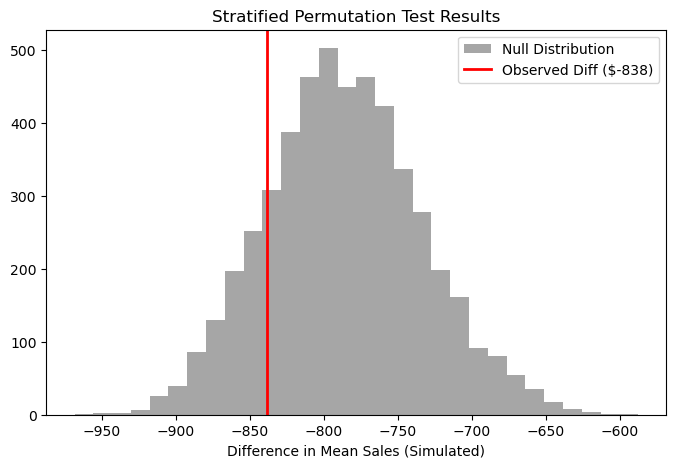

In [40]:
# 6. Interpret the Result
if p_value < 0.05:
    print("RESULT: Statistically Significant! We reject the Null Hypothesis.")
    print("The promotion effect is real, even after controlling for the day of the week.")
else:
    print("RESULT: Not Significant. We fail to reject the Null Hypothesis.")
    print("We cannot prove the increase is due to promotions; it might just be random chance.")

# Histogram of results
plt.figure(figsize=(8, 5))
plt.hist(simulated_diffs, bins=30, color='gray', alpha=0.7, label='Null Distribution')
plt.axvline(obs_diff, color='red', linewidth=2, label=f'Observed Diff (${obs_diff:.0f})')
plt.title('Stratified Permutation Test Results')
plt.xlabel('Difference in Mean Sales (Simulated)')
plt.legend()
plt.show()

### Interpretation of results

My results show that we fail to reject the Null Hypothesis.

*P-Value*: 0.83980

This value is much higher than the standard significance level of alpha = 0.05.

What it means: There is an 83.98% chance that we would see a difference in mean sales of $838.34 (or more extreme) purely by random chance. In other words, the difference we observed is highly likely to be due to natural, random fluctuation in the daily sales.

Observed Difference in Mean Sales: $838.34

What it means: After controlling for the day of the week, the average daily net sales on Promo Days was actually $838.34 lower than the average daily Net sales on Regular Days.
